In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
import yfinance as yf

In [3]:
#Download Tata motors data from yahoo finance
df = yf.download('TATAMOTORS.NS')

[*********************100%***********************]  1 of 1 completed


In [4]:
#first 5 samples
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472775,0


In [5]:
# to check dates in index
df.index

DatetimeIndex(['1995-12-25', '1995-12-26', '1995-12-27', '1995-12-28',
               '1995-12-29', '1996-01-01', '1996-01-02', '1996-01-03',
               '1996-01-04', '1996-01-05',
               ...
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26'],
              dtype='datetime64[ns]', name='Date', length=6917, freq=None)

In [6]:
# to check features or columns 
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-20,566.049988,583.950012,562.500000,583.250000,583.250000,18074902
2023-06-21,584.950012,585.900024,574.500000,581.400024,581.400024,9146332
2023-06-22,584.000000,584.700012,568.200012,569.349976,569.349976,11229179
2023-06-23,570.000000,571.150024,557.700012,559.650024,559.650024,9362695
2023-06-26,560.000000,565.900024,557.799988,563.599976,563.599976,4808842


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6917 entries, 1995-12-25 to 2023-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6917 non-null   float64
 1   High       6917 non-null   float64
 2   Low        6917 non-null   float64
 3   Close      6917 non-null   float64
 4   Adj Close  6917 non-null   float64
 5   Volume     6917 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 378.3 KB


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

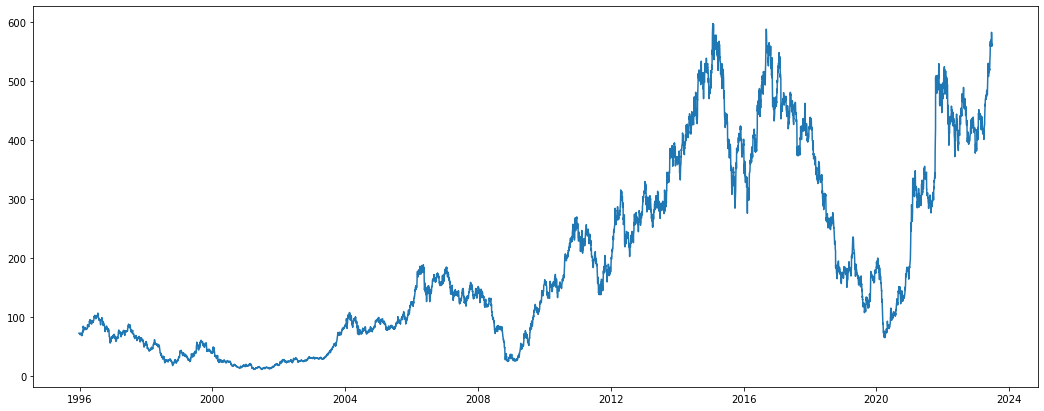

In [11]:
# plot a graph of tata motors 
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [12]:
# check open price for first day and close price for last day
print("Starting price: ",df.iloc[0][0])
print("Ending price: ", df.iloc[-1][3])

Starting price:  72.81962585449219
Ending price:  563.5999755859375


In [13]:
# check start date and end date in our dataset
print("Starting date: ",df.index[0])
print("Ending date: ", df.index[-1])

Starting date:  1995-12-25 00:00:00
Ending date:  2023-06-26 00:00:00


In [14]:
# drop all columns except 'close ' columns as we are going to do prediction only on closing price
df.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [15]:
actual_prices = df['Close'].values

In [16]:
actual_prices

array([ 72.81962585,  72.81962585,  72.81962585, ..., 569.34997559,
       559.65002441, 563.59997559])

In [17]:
actual_returns = (actual_prices[1:] - actual_prices[:-1]) / actual_prices[:-1]

In [18]:
actual_returns

array([ 0.        ,  0.        ,  0.        , ..., -0.02072592,
       -0.01703689,  0.0070579 ])

In [19]:
actual_returns.cumsum()

array([0.        , 0.        , 0.        , ..., 4.85977554, 4.84273866,
       4.84979655])

In [20]:
df.head()

,Close
Date,
1995-12-25,72.819626
1995-12-26,72.819626
1995-12-27,72.819626
1995-12-28,72.819626
1995-12-29,72.819626


In [21]:
# Resample the data to weekly frequency.we can use mean or last
df = df.resample('W').mean()

In [22]:
df.head()

,Close
Date,
1995-12-31,72.819626
1996-01-07,72.068434
1996-01-14,71.526120
1996-01-21,72.150836
1996-01-28,70.113802


In [23]:
df.tail()

,Close
Date,
2023-06-04,527.530005
2023-06-11,558.390002
2023-06-18,566.980005
2023-06-25,571.940002
2023-07-02,563.599976


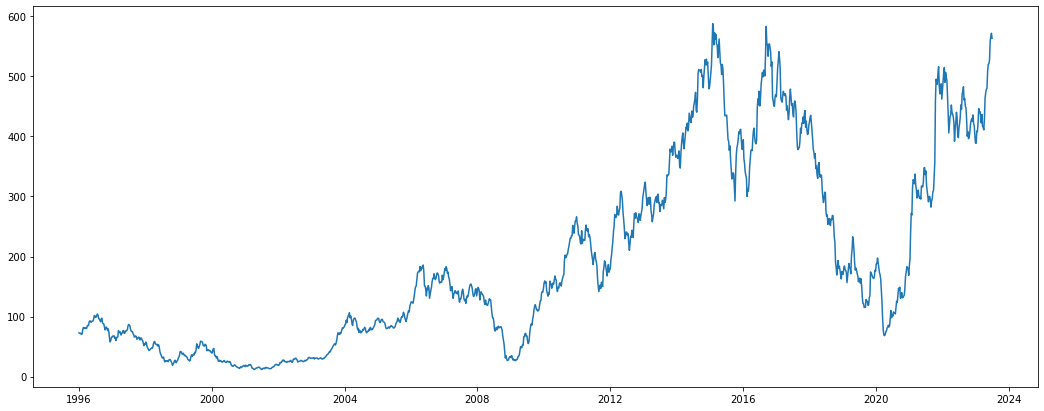

In [24]:
# plot a chart for tata motors
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [25]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
# Preprocess the data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [26]:
df1

array([[0.10595512],
       [0.10465168],
       [0.10371067],
       ...,
       [0.96340969],
       [0.97201615],
       [0.95754475]])

In [27]:
# Split data into training and testing sets
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [28]:
train_size,test_size

(1005, 431)

In [29]:
train_data

array([[0.10595512],
       [0.10465168],
       [0.10371067],
       ...,
       [0.94045415],
       [0.93756997],
       [0.90155234]])

In [30]:
# convert an array of values into a dataset matrix
#function to create new dataset which is required by LSTM.giving sequence of data to our LSTM model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
X_train

array([[0.10595512, 0.10465168, 0.10371067, ..., 0.01184742, 0.01684176,
        0.0185941 ],
       [0.10465168, 0.10371067, 0.10479466, ..., 0.01684176, 0.0185941 ,
        0.02516788],
       [0.10371067, 0.10479466, 0.10126005, ..., 0.0185941 , 0.02516788,
        0.02695679],
       ...,
       [0.51100645, 0.51533269, 0.50484328, ..., 0.93858286, 0.97313267,
        0.95561312],
       [0.51533269, 0.50484328, 0.48925508, ..., 0.97313267, 0.95561312,
        0.96841159],
       [0.50484328, 0.48925508, 0.45376967, ..., 0.95561312, 0.96841159,
        0.94045415]])

In [33]:
y_train

array([2.51678759e-02, 2.69567929e-02, 2.14271098e-02, 1.96847441e-02,
       2.47389347e-02, 2.62585159e-02, 3.27159108e-02, 3.57517509e-02,
       4.11816811e-02, 5.15926503e-02, 5.19850119e-02, 5.02592723e-02,
       4.44336516e-02, 4.46930143e-02, 4.71968330e-02, 4.24518772e-02,
       3.98915309e-02, 4.12747830e-02, 3.86545848e-02, 3.69787225e-02,
       3.47109870e-02, 2.92744065e-02, 2.74189861e-02, 2.71529763e-02,
       2.43000185e-02, 2.84896765e-02, 3.77135744e-02, 4.24784797e-02,
       3.76404214e-02, 4.16471985e-02, 4.43172734e-02, 4.21991707e-02,
       4.96275007e-02, 4.85401848e-02, 5.65803375e-02, 7.42367550e-02,
       6.98542383e-02, 6.31408114e-02, 6.10559568e-02, 6.72007880e-02,
       7.23979599e-02, 8.18280144e-02, 8.12594187e-02, 8.06675462e-02,
       7.88586777e-02, 7.08351497e-02, 6.89398296e-02, 6.73304681e-02,
       7.27969752e-02, 7.20920486e-02, 6.91493117e-02, 5.44057058e-02,
       5.70791062e-02, 5.47049676e-02, 5.64506575e-02, 5.44888346e-02,
      

In [34]:
X_test

array([[0.92673724, 0.95565347, 0.92236412, ..., 0.69267037, 0.66395324,
        0.63641602],
       [0.95565347, 0.92236412, 0.88615972, ..., 0.66395324, 0.63641602,
        0.62820863],
       [0.92236412, 0.88615972, 0.88009092, ..., 0.63641602, 0.62820863,
        0.61162038],
       ...,
       [0.16299097, 0.160822  , 0.17942307, ..., 0.88220352, 0.88345283,
        0.89495705],
       [0.160822  , 0.17942307, 0.19727801, ..., 0.88345283, 0.89495705,
        0.94850454],
       [0.17942307, 0.19727801, 0.1936862 , ..., 0.89495705, 0.94850454,
        0.96340969]])

In [35]:
print(X_train.shape) 

(854, 150)


In [36]:
print(y_train.shape)

(854,)


In [37]:
print(X_test.shape)

(280, 150)


In [38]:
 print(ytest.shape)

(280,)


In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
X_train.shape

(854, 150, 1)

In [41]:
X_train

array([[[0.10595512],
        [0.10465168],
        [0.10371067],
        ...,
        [0.01184742],
        [0.01684176],
        [0.0185941 ]],

       [[0.10465168],
        [0.10371067],
        [0.10479466],
        ...,
        [0.01684176],
        [0.0185941 ],
        [0.02516788]],

       [[0.10371067],
        [0.10479466],
        [0.10126005],
        ...,
        [0.0185941 ],
        [0.02516788],
        [0.02695679]],

       ...,

       [[0.51100645],
        [0.51533269],
        [0.50484328],
        ...,
        [0.93858286],
        [0.97313267],
        [0.95561312]],

       [[0.51533269],
        [0.50484328],
        [0.48925508],
        ...,
        [0.97313267],
        [0.95561312],
        [0.96841159]],

       [[0.50484328],
        [0.48925508],
        [0.45376967],
        ...,
        [0.95561312],
        [0.96841159],
        [0.94045415]]])

In [42]:
### Create the Stacked LSTM model
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model

In [43]:
#model=Sequential()
#model.add(LSTM(300, input_shape = (time_step , 1), return_sequences=True))
#model.add(Dropout(0.5))
#model.add(LSTM(200, input_shape=(time_step , 1), return_sequences=False))
#model.add(Dropout(0.5))
#model.add(Dense(100,kernel_initializer='uniform',activation='relu'))        
#model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
#model.compile(loss='mse',optimizer='adam')

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 5s 343ms/step - loss: 0.0023 - val_loss: 0.0116
Epoch 2/100
14/14 [==============================] - 5s 369ms/step - loss: 0.0018 - val_loss: 0.0112
Epoch 3/100
14/14 [==============================] - 5s 380ms/step - loss: 0.0015 - val_loss: 0.0117
Epoch 4/100
14/14 [==============================] - 6s 414ms/step - loss: 0.0015 - val_loss: 0.0105
Epoch 5/100
14/14 [==============================] - 7s 488ms/step - loss: 0.0014 - val_loss: 0.0096
Epoch 6/100
14/14 [==============================] - 7s 491ms/step - loss: 0.0014 - val_loss: 0.0096
Epoch 7/100
14/14 [==============================] - 6s 405ms/step - loss: 0.0014 - val_loss: 0.0095
Epoch 8/100
14/14 [==============================] - 5s 377ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 9/100
14/14 [==============================] - 5s 382ms/step - loss: 0.0013 - val_loss: 0.0079
Epoch 10/100
14/14 [==============================] - 6s 439ms/step - loss: 0.0013 - val_lo

14/14 [==============================] - 5s 381ms/step - loss: 3.5562e-04 - val_loss: 0.0036
Epoch 80/100
14/14 [==============================] - 6s 406ms/step - loss: 3.4196e-04 - val_loss: 0.0035
Epoch 81/100
14/14 [==============================] - 5s 384ms/step - loss: 3.2081e-04 - val_loss: 0.0036
Epoch 82/100
14/14 [==============================] - 5s 384ms/step - loss: 3.2766e-04 - val_loss: 0.0041
Epoch 83/100
14/14 [==============================] - 5s 381ms/step - loss: 3.3898e-04 - val_loss: 0.0036
Epoch 84/100
14/14 [==============================] - 5s 387ms/step - loss: 4.0919e-04 - val_loss: 0.0028
Epoch 85/100
14/14 [==============================] - 5s 379ms/step - loss: 3.7317e-04 - val_loss: 0.0028
Epoch 86/100
14/14 [==============================] - 5s 387ms/step - loss: 3.1835e-04 - val_loss: 0.0032
Epoch 87/100
14/14 [==============================] - 6s 427ms/step - loss: 2.9948e-04 - val_loss: 0.0030
Epoch 88/100
14/14 [==============================] - 5s 38

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 1s 64ms/step


In [48]:
train_predict

array([[0.0155037 ],
       [0.01620195],
       [0.01856672],
       [0.0206643 ],
       [0.02163578],
       [0.02240061],
       [0.02338534],
       [0.02544194],
       [0.02850457],
       [0.03256151],
       [0.03828387],
       [0.04438262],
       [0.04921625],
       [0.05124752],
       [0.05109939],
       [0.05033478],
       [0.04890976],
       [0.04694285],
       [0.04527633],
       [0.04379714],
       [0.04236163],
       [0.04076459],
       [0.03837477],
       [0.03545447],
       [0.03265666],
       [0.02998712],
       [0.0284043 ],
       [0.02927686],
       [0.03243606],
       [0.03559567],
       [0.03839977],
       [0.04090807],
       [0.04250649],
       [0.04443358],
       [0.04633761],
       [0.04923336],
       [0.05553323],
       [0.06256218],
       [0.06709768],
       [0.06844939],
       [0.06882963],
       [0.07004659],
       [0.0736696 ],
       [0.07823063],
       [0.08212474],
       [0.08430119],
       [0.08338481],
       [0.080

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
train_predict

array([[ 20.691486 ],
       [ 21.093897 ],
       [ 22.456741 ],
       [ 23.665594 ],
       [ 24.22547  ],
       [ 24.666254 ],
       [ 25.23376  ],
       [ 26.419004 ],
       [ 28.184032 ],
       [ 30.52209  ],
       [ 33.819946 ],
       [ 37.334724 ],
       [ 40.120396 ],
       [ 41.291035 ],
       [ 41.20567  ],
       [ 40.76502  ],
       [ 39.94376  ],
       [ 38.81021  ],
       [ 37.849773 ],
       [ 36.997303 ],
       [ 36.170006 ],
       [ 35.249615 ],
       [ 33.872337 ],
       [ 32.189335 ],
       [ 30.576923 ],
       [ 29.038439 ],
       [ 28.126245 ],
       [ 28.629107 ],
       [ 30.44979  ],
       [ 32.27071  ],
       [ 33.88674  ],
       [ 35.332302 ],
       [ 36.25349  ],
       [ 37.36409  ],
       [ 38.461403 ],
       [ 40.130253 ],
       [ 43.76094  ],
       [ 47.811802 ],
       [ 50.42566  ],
       [ 51.204666 ],
       [ 51.423798 ],
       [ 52.12515  ],
       [ 54.213127 ],
       [ 56.8417   ],
       [ 59.08592  ],
       [ 6

In [51]:
test_predict

array([[414.72028 ],
       [410.16058 ],
       [406.38614 ],
       [409.42972 ],
       [397.99887 ],
       [390.76926 ],
       [381.16312 ],
       [373.1522  ],
       [382.7121  ],
       [393.73218 ],
       [385.59802 ],
       [373.0657  ],
       [369.42874 ],
       [370.34036 ],
       [360.14706 ],
       [345.15674 ],
       [333.41794 ],
       [332.97922 ],
       [341.48474 ],
       [347.40744 ],
       [331.37177 ],
       [312.08105 ],
       [303.78052 ],
       [296.2523  ],
       [294.94843 ],
       [297.60532 ],
       [295.3529  ],
       [290.39838 ],
       [291.31903 ],
       [293.1971  ],
       [296.755   ],
       [298.62985 ],
       [291.87473 ],
       [275.32562 ],
       [259.79593 ],
       [238.71379 ],
       [221.46939 ],
       [208.8008  ],
       [206.13037 ],
       [212.23436 ],
       [214.04543 ],
       [212.59532 ],
       [207.23878 ],
       [198.69536 ],
       [189.34488 ],
       [187.06982 ],
       [187.56978 ],
       [188.4

In [52]:
ytest

array([0.62820863, 0.61162038, 0.62389238, 0.58101188, 0.58783113,
       0.56171676, 0.55241043, 0.59182204, 0.59829422, 0.56284461,
       0.55614683, 0.56277086, 0.56041537, 0.52217212, 0.49871256,
       0.48264484, 0.49411435, 0.51222956, 0.5121081 , 0.45502085,
       0.44310021, 0.44686554, 0.41957125, 0.43137042, 0.43628098,
       0.41990093, 0.41645227, 0.43564763, 0.43329647, 0.44546006,
       0.44462716, 0.41977079, 0.38330609, 0.36847469, 0.31002967,
       0.2940357 , 0.2731572 , 0.292435  , 0.31498793, 0.29278203,
       0.29846039, 0.28688243, 0.27300103, 0.26177447, 0.28334267,
       0.27566453, 0.27517001, 0.29345875, 0.29935834, 0.28889524,
       0.28615366, 0.28086138, 0.2511335 , 0.26953069, 0.28967607,
       0.30639881, 0.29467337, 0.29223545, 0.27666226, 0.32765904,
       0.34629481, 0.38360685, 0.3708996 , 0.34459435, 0.30862418,
       0.28740299, 0.29314642, 0.2869692 , 0.27759491, 0.27027681,
       0.25370589, 0.26043838, 0.26397813, 0.24962824, 0.26224

In [53]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



193.399561618561

In [54]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

328.56653788253493

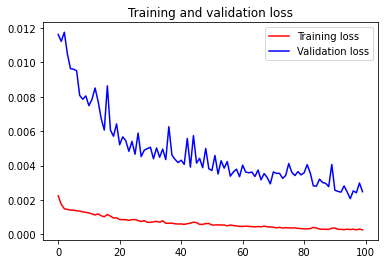

<Figure size 432x288 with 0 Axes>

In [55]:
### plot a graph for training and validation loss to visualize the results of model training

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.figure()


plt.show()

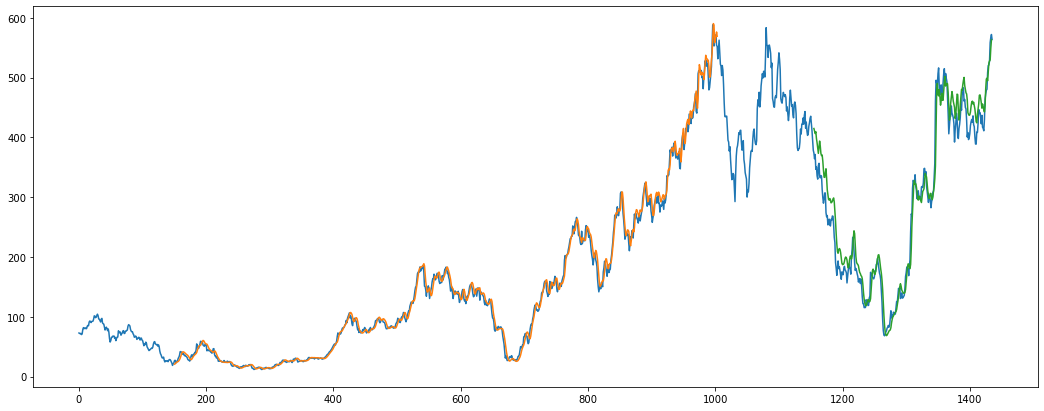

In [56]:
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)  ## to take same shape and sata type of df1
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt1 = plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
ytest

array([0.62820863, 0.61162038, 0.62389238, 0.58101188, 0.58783113,
       0.56171676, 0.55241043, 0.59182204, 0.59829422, 0.56284461,
       0.55614683, 0.56277086, 0.56041537, 0.52217212, 0.49871256,
       0.48264484, 0.49411435, 0.51222956, 0.5121081 , 0.45502085,
       0.44310021, 0.44686554, 0.41957125, 0.43137042, 0.43628098,
       0.41990093, 0.41645227, 0.43564763, 0.43329647, 0.44546006,
       0.44462716, 0.41977079, 0.38330609, 0.36847469, 0.31002967,
       0.2940357 , 0.2731572 , 0.292435  , 0.31498793, 0.29278203,
       0.29846039, 0.28688243, 0.27300103, 0.26177447, 0.28334267,
       0.27566453, 0.27517001, 0.29345875, 0.29935834, 0.28889524,
       0.28615366, 0.28086138, 0.2511335 , 0.26953069, 0.28967607,
       0.30639881, 0.29467337, 0.29223545, 0.27666226, 0.32765904,
       0.34629481, 0.38360685, 0.3708996 , 0.34459435, 0.30862418,
       0.28740299, 0.29314642, 0.2869692 , 0.27759491, 0.27027681,
       0.25370589, 0.26043838, 0.26397813, 0.24962824, 0.26224

In [58]:
test_predict

array([[414.72028 ],
       [410.16058 ],
       [406.38614 ],
       [409.42972 ],
       [397.99887 ],
       [390.76926 ],
       [381.16312 ],
       [373.1522  ],
       [382.7121  ],
       [393.73218 ],
       [385.59802 ],
       [373.0657  ],
       [369.42874 ],
       [370.34036 ],
       [360.14706 ],
       [345.15674 ],
       [333.41794 ],
       [332.97922 ],
       [341.48474 ],
       [347.40744 ],
       [331.37177 ],
       [312.08105 ],
       [303.78052 ],
       [296.2523  ],
       [294.94843 ],
       [297.60532 ],
       [295.3529  ],
       [290.39838 ],
       [291.31903 ],
       [293.1971  ],
       [296.755   ],
       [298.62985 ],
       [291.87473 ],
       [275.32562 ],
       [259.79593 ],
       [238.71379 ],
       [221.46939 ],
       [208.8008  ],
       [206.13037 ],
       [212.23436 ],
       [214.04543 ],
       [212.59532 ],
       [207.23878 ],
       [198.69536 ],
       [189.34488 ],
       [187.06982 ],
       [187.56978 ],
       [188.4

In [59]:
test_predict1 = test_predict.flatten()

In [60]:
test_predict1

array([414.72028 , 410.16058 , 406.38614 , 409.42972 , 397.99887 ,
       390.76926 , 381.16312 , 373.1522  , 382.7121  , 393.73218 ,
       385.59802 , 373.0657  , 369.42874 , 370.34036 , 360.14706 ,
       345.15674 , 333.41794 , 332.97922 , 341.48474 , 347.40744 ,
       331.37177 , 312.08105 , 303.78052 , 296.2523  , 294.94843 ,
       297.60532 , 295.3529  , 290.39838 , 291.31903 , 293.1971  ,
       296.755   , 298.62985 , 291.87473 , 275.32562 , 259.79593 ,
       238.71379 , 221.46939 , 208.8008  , 206.13037 , 212.23436 ,
       214.04543 , 212.59532 , 207.23878 , 198.69536 , 189.34488 ,
       187.06982 , 187.56978 , 188.47388 , 192.54045 , 198.02579 ,
       199.90463 , 198.43283 , 195.0116  , 186.21382 , 181.66878 ,
       185.35994 , 194.96294 , 201.06529 , 201.79428 , 196.35135 ,
       200.7584  , 213.18542 , 232.35475 , 243.67484 , 238.96979 ,
       220.5676  , 200.52913 , 190.89476 , 188.57248 , 187.48402 ,
       184.99245 , 178.75389 , 174.02638 , 172.19812 , 168.764

In [61]:
ytest1 = ytest.flatten()

In [62]:
ytest1 = ytest1.reshape(1,-1)

In [63]:
ytest1

array([[0.62820863, 0.61162038, 0.62389238, 0.58101188, 0.58783113,
        0.56171676, 0.55241043, 0.59182204, 0.59829422, 0.56284461,
        0.55614683, 0.56277086, 0.56041537, 0.52217212, 0.49871256,
        0.48264484, 0.49411435, 0.51222956, 0.5121081 , 0.45502085,
        0.44310021, 0.44686554, 0.41957125, 0.43137042, 0.43628098,
        0.41990093, 0.41645227, 0.43564763, 0.43329647, 0.44546006,
        0.44462716, 0.41977079, 0.38330609, 0.36847469, 0.31002967,
        0.2940357 , 0.2731572 , 0.292435  , 0.31498793, 0.29278203,
        0.29846039, 0.28688243, 0.27300103, 0.26177447, 0.28334267,
        0.27566453, 0.27517001, 0.29345875, 0.29935834, 0.28889524,
        0.28615366, 0.28086138, 0.2511335 , 0.26953069, 0.28967607,
        0.30639881, 0.29467337, 0.29223545, 0.27666226, 0.32765904,
        0.34629481, 0.38360685, 0.3708996 , 0.34459435, 0.30862418,
        0.28740299, 0.29314642, 0.2869692 , 0.27759491, 0.27027681,
        0.25370589, 0.26043838, 0.26397813, 0.24

In [64]:
ytest2 = scaler.inverse_transform(ytest1)

In [65]:
ytest2

array([[373.79999542, 364.24000244, 371.31249237, 346.5999939 ,
        350.52999878, 335.48000488, 330.1166687 , 352.83000488,
        356.55999146, 336.12999878, 332.26999512, 336.0874939 ,
        334.72999878, 312.69000244, 299.17000122, 289.90999756,
        296.52000122, 306.95999756, 306.88999634, 273.98999634,
        267.12000122, 269.29000244, 253.56000366, 260.35999756,
        263.19000244, 253.75000305, 251.76250076, 262.82499695,
        261.47000122, 268.48000488, 268.        , 253.67500305,
        232.66000061, 224.11250305, 190.43000183, 181.21250153,
        169.17999878, 180.29000244, 193.28750229, 180.48999939,
        183.76250076, 177.08999939, 169.08999634, 162.62000427,
        175.04999695, 170.625     , 170.33999939, 180.88000183,
        184.27999878, 178.25      , 176.67000122, 173.62000122,
        156.48749924, 167.08999939, 178.7       , 188.33750153,
        181.58000183, 180.17499924, 171.20000458, 200.58999939,
        211.32999878, 232.83333333, 225.

In [66]:
ytest2 = ytest2.flatten()

In [67]:
# creating dataframe to calculate further analysis like profit and loss

df1 = pd.DataFrame({'actual':ytest2,'predicted':test_predict1})

In [68]:
df1.head()

,actual,predicted
0,373.799995,414.720276
1,364.240002,410.160583
2,371.312492,406.386139
3,346.599994,409.429718
4,350.529999,397.998871


In [69]:
# Generate buy and sell signals as 1 and 0 respectively
system_signals = []
#sell_signals = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        system_signals.append(1)
    else:
        system_signals.append(0)


In [70]:
system_signals

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,


In [71]:
len(system_signals)

279

In [72]:
# inserting any value at 0th index position as previous signals generated from 1st index.to match length of our dataset

system_signals.insert(0,'start')

In [73]:
system_signals

['start',
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1

In [74]:
signals1 = np.array(system_signals)

In [75]:
signals1

array(['start', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0'

In [76]:
signals1.flatten()

array(['start', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0'

In [77]:
# adding signals column in our dataframe(here created new dataframe)

df2 = pd.DataFrame({'actual':ytest2,'predicted':test_predict1,'signals':signals1})

In [78]:
df2.head()

,actual,predicted,signals
0,373.799995,414.720276,start
1,364.240002,410.160583,0
2,371.312492,406.386139,0
3,346.599994,409.429718,1
4,350.529999,397.998871,0


In [79]:
df2.tail(10)

,actual,predicted,signals
270,472.509998,481.179260,1
271,478.700006,497.369110,1
272,480.462502,498.977203,1
273,508.240002,494.537109,0
274,520.180005,508.455109,1
275,520.900000,524.240662,1
276,527.530005,527.731140,1
277,558.390002,529.146729,1
278,566.980005,549.021057,1
279,571.940002,562.952026,1


In [80]:
df2.shape

(280, 3)

In [81]:
# collecting all positions where buy signal triggered.here we collect buy and sell signals and aim is to do sum of both to  
# calculate profit or loss made by our strategy

buy_count = []
for i in range(279):
    if df2['signals'][i]=='0' and df2['signals'][i+1]=='1':
        buy_count.append(df2['actual'][i+1])
    else:
        continue

In [82]:
# collecting all positions where sell signal triggered for summation

sell_count = []
for i in range(279):
    if df2['signals'][i]=='1' and df2['signals'][i+1]=='0':
        sell_count.append(df2['actual'][i+1]) 
    else:
        continue

In [83]:
sell_count

[350.5299987792969,
 332.2699951171875,
 299.1700012207031,
 267.1200012207031,
 251.76250076293945,
 232.66000061035157,
 177.08999938964843,
 173.62000122070313,
 200.58999938964843,
 189.62000122070313,
 119.12500190734863,
 163.25,
 173.1500030517578,
 132.8375015258789,
 184.86000061035156,
 337.3799987792969,
 312.05,
 299.7099975585937,
 342.6199951171875,
 282.2399963378906,
 506.4599975585937,
 470.90000610351564,
 476.0299987792968,
 506.7099975585937,
 467.4800048828125,
 437.2399963378906,
 401.57000732421875,
 471.47999877929686,
 463.2750015258789,
 435.88999633789064,
 417.77000122070314,
 433.9800048828125,
 415.00999755859374,
 508.24000244140626]

In [84]:
buy_count

[346.59999389648436,
 356.55999145507815,
 312.69000244140625,
 306.88999633789064,
 253.75000305175783,
 261.4700012207031,
 180.48999938964846,
 170.33999938964843,
 188.33750152587893,
 211.3299987792969,
 125.96000061035156,
 134.48999786376953,
 175.57500076293945,
 80.89999961853027,
 135.9,
 241.28999938964844,
 318.8625030517578,
 300.7249984741211,
 317.760009765625,
 300.20000610351565,
 307.90000610351564,
 484.64000244140624,
 487.7100036621094,
 491.2800048828125,
 498.9800048828125,
 433.8800048828125,
 422.89000244140624,
 421.8400024414062,
 474.49999237060547,
 405.9375,
 421.2900024414063,
 408.1199951171875,
 417.02000122070314,
 463.75,
 520.1800048828125]

In [85]:
from functools import reduce

In [86]:
# sum of all positions where sell signal triggered

sell_sum = reduce(lambda x,y:x+y,sell_count)

In [87]:
sell_sum

11233.690005111692

In [88]:
# sum of all positions where buy signal triggered

buy_sum = reduce(lambda x,y:x+y,buy_count)

In [89]:
buy_sum

11380.037530899048

In [90]:
len(sell_count)

34

In [91]:
len(buy_count)

35

### Total Profit/Loss

In [92]:
# to calculate total profit or loss we have to buy positions from sell positions.but no.of buy position must match sell positions
# so,we remove last buy position as it is still active and not completed
buy_sum = buy_sum - buy_count[-1]

Total_pnl = sell_sum - buy_sum

In [93]:
Total_pnl

373.8324790954557

In [94]:
# so,our strategy made total 373 points gross profit.now lets check for which period we received this profit
# Generate buy and sell time period

buy_period = []
sell_period = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        buy_period.append(df.index[train_size + time_step + i])
    else:
        sell_period.append(df.index[train_size + time_step + i])

In [95]:
buy_period

[Timestamp('2018-03-11 00:00:00', freq='W-SUN'),
 Timestamp('2018-04-15 00:00:00', freq='W-SUN'),
 Timestamp('2018-04-22 00:00:00', freq='W-SUN'),
 Timestamp('2018-05-20 00:00:00', freq='W-SUN'),
 Timestamp('2018-06-24 00:00:00', freq='W-SUN'),
 Timestamp('2018-07-01 00:00:00', freq='W-SUN'),
 Timestamp('2018-08-12 00:00:00', freq='W-SUN'),
 Timestamp('2018-09-02 00:00:00', freq='W-SUN'),
 Timestamp('2018-09-09 00:00:00', freq='W-SUN'),
 Timestamp('2018-09-16 00:00:00', freq='W-SUN'),
 Timestamp('2018-09-23 00:00:00', freq='W-SUN'),
 Timestamp('2018-11-18 00:00:00', freq='W-SUN'),
 Timestamp('2018-11-25 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-06 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-13 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-20 00:00:00', freq='W-SUN'),
 Timestamp('2019-01-27 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-03 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-10 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-17 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-

In [96]:
# to remove timestamp

print("Buy periods:")
for signal in buy_period:
    print(signal.date())
print("\n Sell periods:")
for signal in sell_period:
    print(signal.date())

Buy periods:
2018-03-11
2018-04-15
2018-04-22
2018-05-20
2018-06-24
2018-07-01
2018-08-12
2018-09-02
2018-09-09
2018-09-16
2018-09-23
2018-11-18
2018-11-25
2019-01-06
2019-01-13
2019-01-20
2019-01-27
2019-02-03
2019-03-10
2019-03-17
2019-03-24
2019-03-31
2019-04-14
2019-04-21
2019-04-28
2019-05-05
2019-09-22
2019-09-29
2019-10-06
2019-10-27
2019-11-03
2019-11-10
2019-11-17
2019-11-24
2019-12-01
2019-12-29
2020-01-05
2020-01-12
2020-01-19
2020-01-26
2020-02-02
2020-05-03
2020-05-10
2020-05-17
2020-05-24
2020-05-31
2020-06-07
2020-06-14
2020-06-21
2020-06-28
2020-07-05
2020-07-12
2020-07-19
2020-07-26
2020-08-02
2020-08-09
2020-08-16
2020-08-23
2020-08-30
2020-09-06
2020-09-13
2020-09-20
2020-09-27
2020-11-08
2020-11-15
2020-11-22
2020-11-29
2020-12-06
2020-12-13
2020-12-20
2020-12-27
2021-01-17
2021-01-24
2021-01-31
2021-02-07
2021-02-14
2021-02-21
2021-02-28
2021-03-14
2021-04-18
2021-04-25
2021-05-23
2021-05-30
2021-06-06
2021-06-13
2021-06-20
2021-06-27
2021-08-15
2021-08-22
2021-09-

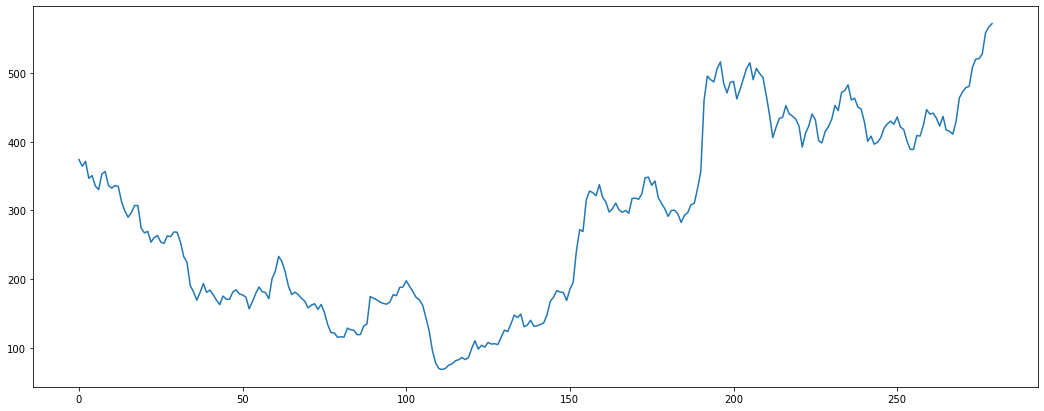

In [98]:
# we generated profit for period from 25.2.2018 to 25.6.2023.now we will compare our strategy profit with convntional
# buy and hold method

# plot a chart for tata motors for our testing period
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df2['actual'])

In [107]:
# profit or loss made by conventional buy and hold method

#start period 
start_period = df['Close'][df.index == '2018-02-25']
start_period[0]

364.24000244140626

In [108]:
# end period 
end_period = df['Close'][df.index == '2023-06-25']
end_period[0]

571.9400024414062

In [109]:
# profit or loss for buy and hold

pnl_for_bah = end_period[0] - start_period[0]
pnl_for_bah

207.7

In [110]:
# profit and loss for our LSTM based model 

Total_pnl

373.8324790954557

In [111]:
# now we calculate net profit on our strategy
# for simplicity we assume portfolio size of Rs.1,00,000/-

avg_share = np.round(100000/571) #we have taken end or high value here for assumption
avg_share


175.0

### Net profit

In [112]:
# we are refering zerodha brokerage calculator here for brokerage and tax calculation.link:https://zerodha.com/brokerage-calculator/#tab-equities
# net profir made by buy and hold method

#total tax and charges for one complete transaction calculated from zerodha website:https://zerodha.com/brokerage-calculator/#tab-equities
Total_tax_and_charges = 196

net_buy_hold_profit = (pnl_for_bah *175)-Total_tax_and_charges
net_buy_hold_profit

36151.5

In [113]:
# net profir made by AI based strategy

net_profit = (Total_pnl*175) - (Total_tax_and_charges* len(sell_count)) # or buy_count.both are same as we consider whole one complete transaction
net_profit 

58756.68384170475

In [118]:
# Total % net profit on our portfolio of Rs.100000 using buy and hold method

net_buy_hold_profit_percent = (net_buy_hold_profit *100)/100000
print(f'Total net profit percent generated by buy and hold method:{net_buy_hold_profit_percent}%')

Total net profit percent generated by buy and hold method:36.1515%


In [119]:
# Total % net profit on our portfolio of Rs.100000 using AI based strategy

net_profit_percent = (net_profit *100)/100000
print(f'Total net profit percent generated by AI based strategy:{net_profit_percent}%')

Total net profit percent generated by AI based strategy:58.75668384170474%


In [120]:
#extra profit generated by AI based strategy in Rs.

net_profit - net_buy_hold_profit

22605.183841704747

In [121]:
# in percent
net_profit_percent - net_buy_hold_profit_percent

22.605183841704743